<a href="https://colab.research.google.com/github/Jkia65/Assignment-3-Python-Refresher/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 9

Step 1: Dataset Loading and Preprocessing

In [17]:
# Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# Load Dataset & Display first few rows
df = pd.read_csv('real_estate.csv')
df.head()

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


In [18]:

# Check for missing values and basic info:

df.info()
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB
               No   house age  distance to the nearest MRT station  \
count  414.000000  414.000000                           414.000000   
mean   207.500000   17.712560                          1083.885689   
std    119.655756   11.392485            

,0
No,0
house age,0
distance to the nearest MRT station,0
number of convenience stores,0
latitude,0
longitude,0
house price of unit area,0


In [19]:
# Feature Scaling:

features = ['house age', 'distance to the nearest MRT station',
            'number of convenience stores', 'latitude', 'longitude']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

Step 2: Clustering

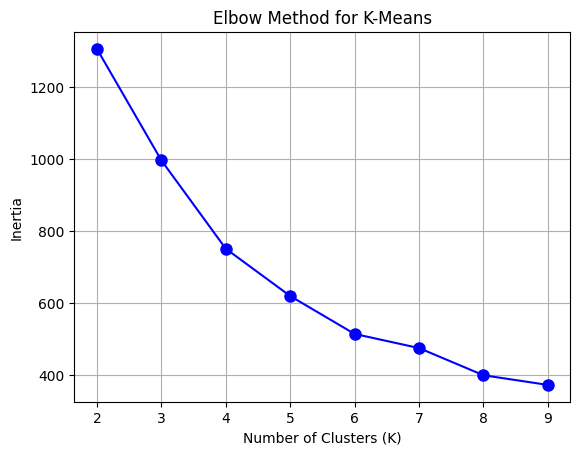

In [20]:
# 2.1 K-Means Clustering

# Determine optimal K using Elbow method
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.grid(True)
plt.show()

# Fit K-Means (choose K=3 based on Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


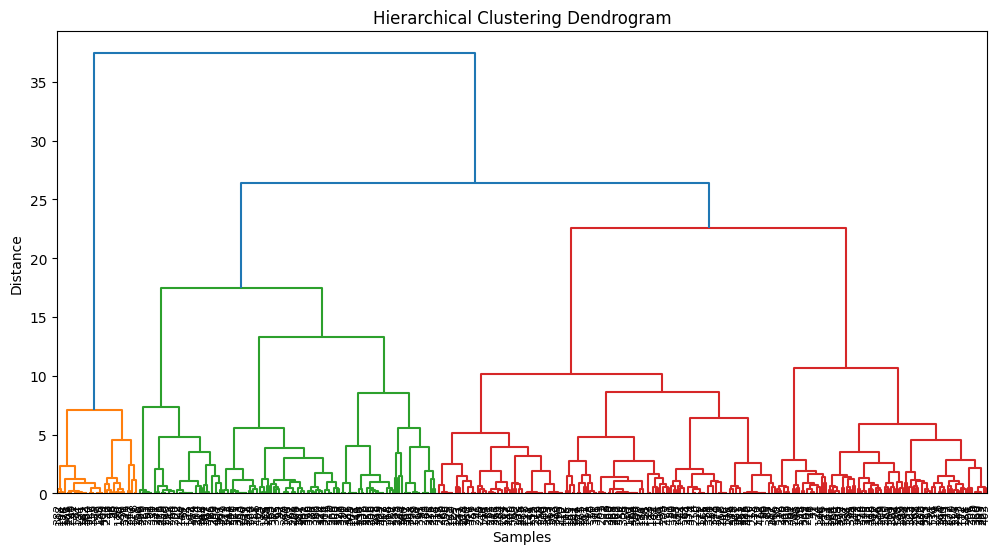

In [21]:
# 2.2 Hierarchical Clustering

# Generate linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering (3 clusters)
hier_labels = AgglomerativeClustering(n_clusters=3).fit_predict(X_scaled)

Step 3: Dimensionality Reduction (PCA)

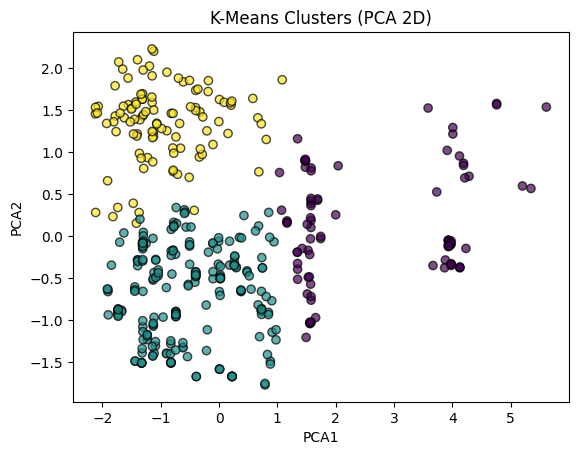

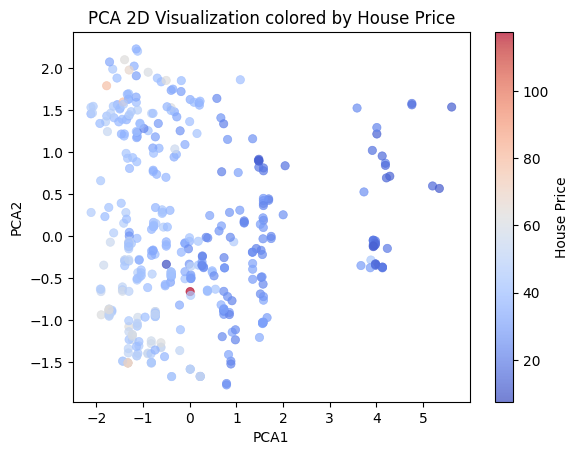

In [22]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize K-Means clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means Clusters (PCA 2D)")
plt.show()

# Visualize PCA colored by House Price
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['house price of unit area'], cmap='coolwarm', alpha=0.7, linewidths=0.5)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA 2D Visualization colored by House Price")
plt.colorbar(label="House Price")
plt.show()

Step 4: Model Evaluation:

In [23]:
# K-Means evaluation
sil_k = silhouette_score(X_scaled, kmeans_labels)
ch_k = calinski_harabasz_score(X_scaled, kmeans_labels)
db_k = davies_bouldin_score(X_scaled, kmeans_labels)

print("=== K-Means Evaluation ===")
print(f"Silhouette Score: {sil_k:.3f}")
print(f"Calinski-Harabasz Score: {ch_k:.3f}")
print(f"Davies-Bouldin Score: {db_k:.3f}")

# Hierarchical evaluation
sil_h = silhouette_score(X_scaled, hier_labels)
ch_h = calinski_harabasz_score(X_scaled, hier_labels)
db_h = davies_bouldin_score(X_scaled, hier_labels)

print("=== Hierarchical Evaluation ===")
print(f"Silhouette Score: {sil_h:.3f}")
print(f"Calinski-Harabasz Score: {ch_h:.3f}")
print(f"Davies-Bouldin Score: {db_h:.3f}")

=== K-Means Evaluation ===
Silhouette Score: 0.317
Calinski-Harabasz Score: 221.636
Davies-Bouldin Score: 1.164
=== Hierarchical Evaluation ===
Silhouette Score: 0.318
Calinski-Harabasz Score: 210.664
Davies-Bouldin Score: 1.279
